# PROBLEM DEFINITION

PROJECT DISCRIPTION:

HR Analytics Project

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# PROBLEM DISCRIPTION:


    FROM THE ABOVE DISCRIPTION WE CAN FIND THAT THE "ATTRITION" PLAYS AN IMPORTANT ROLE IN THE GROWTH OF A COMPANY.
    IT DIRECTLY IMPACTS THE CURRENT EMPLOYEES AND THE FUTURE OF THE COMPANY.
    THUS, IN THIS PROJECT WE WILL BUILD A MACHINE LEARNING MODEL TO FIND THE ATTRITION WITH THE GIVEN DATA-SET.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
df=pd.read_csv("ibm-hr-analytics-employee-attrition-performance.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# DATA ANALYSIS

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

> IN THIS ABOVE TABLE WE CAN FIND THAT MANY OF THE ATTRIBUTES ARE IN OBJECT TYPE.
  SO WE CONVERT THEM TO NUMERICAL VALUES FOR A BETTER DATA ANALYSIS.

In [5]:
df.shape

(1470, 35)

In [6]:
df["Attrition"].unique()

array(['Yes', 'No'], dtype=object)

In [7]:
df["BusinessTravel"].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [8]:
df["EducationField"].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [9]:
df["Over18"].unique()

array(['Y'], dtype=object)

In [10]:
df["Department"].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [11]:
df["JobRole"].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [12]:
df["OverTime"].unique()

array(['Yes', 'No'], dtype=object)

> CONVERTING THE OJECT VALUES TO NUMERICAL VALUES USING "LABEL ENCODER"

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for columns in df.columns:
    df["Attrition"]=le.fit_transform(df["Attrition"])
    df["BusinessTravel"]=le.fit_transform(df["BusinessTravel"])
    df["Department"]=le.fit_transform(df["Department"])
    df["EducationField"]=le.fit_transform(df["EducationField"])
    df["Gender"]=le.fit_transform(df["Gender"])
    df["JobRole"]=le.fit_transform(df["JobRole"])
    df["MaritalStatus"]=le.fit_transform(df["MaritalStatus"])
    df["Over18"]=le.fit_transform(df["Over18"])
    df["OverTime"]=le.fit_transform(df["OverTime"])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

--ACQUIRING STATISTICAL DATA

In [15]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


> FINDING NaN VALUES.

In [16]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# EXPLORATORY DATA ANALYSIS(EDA) AND PRE-PROCESSING PIPELINE

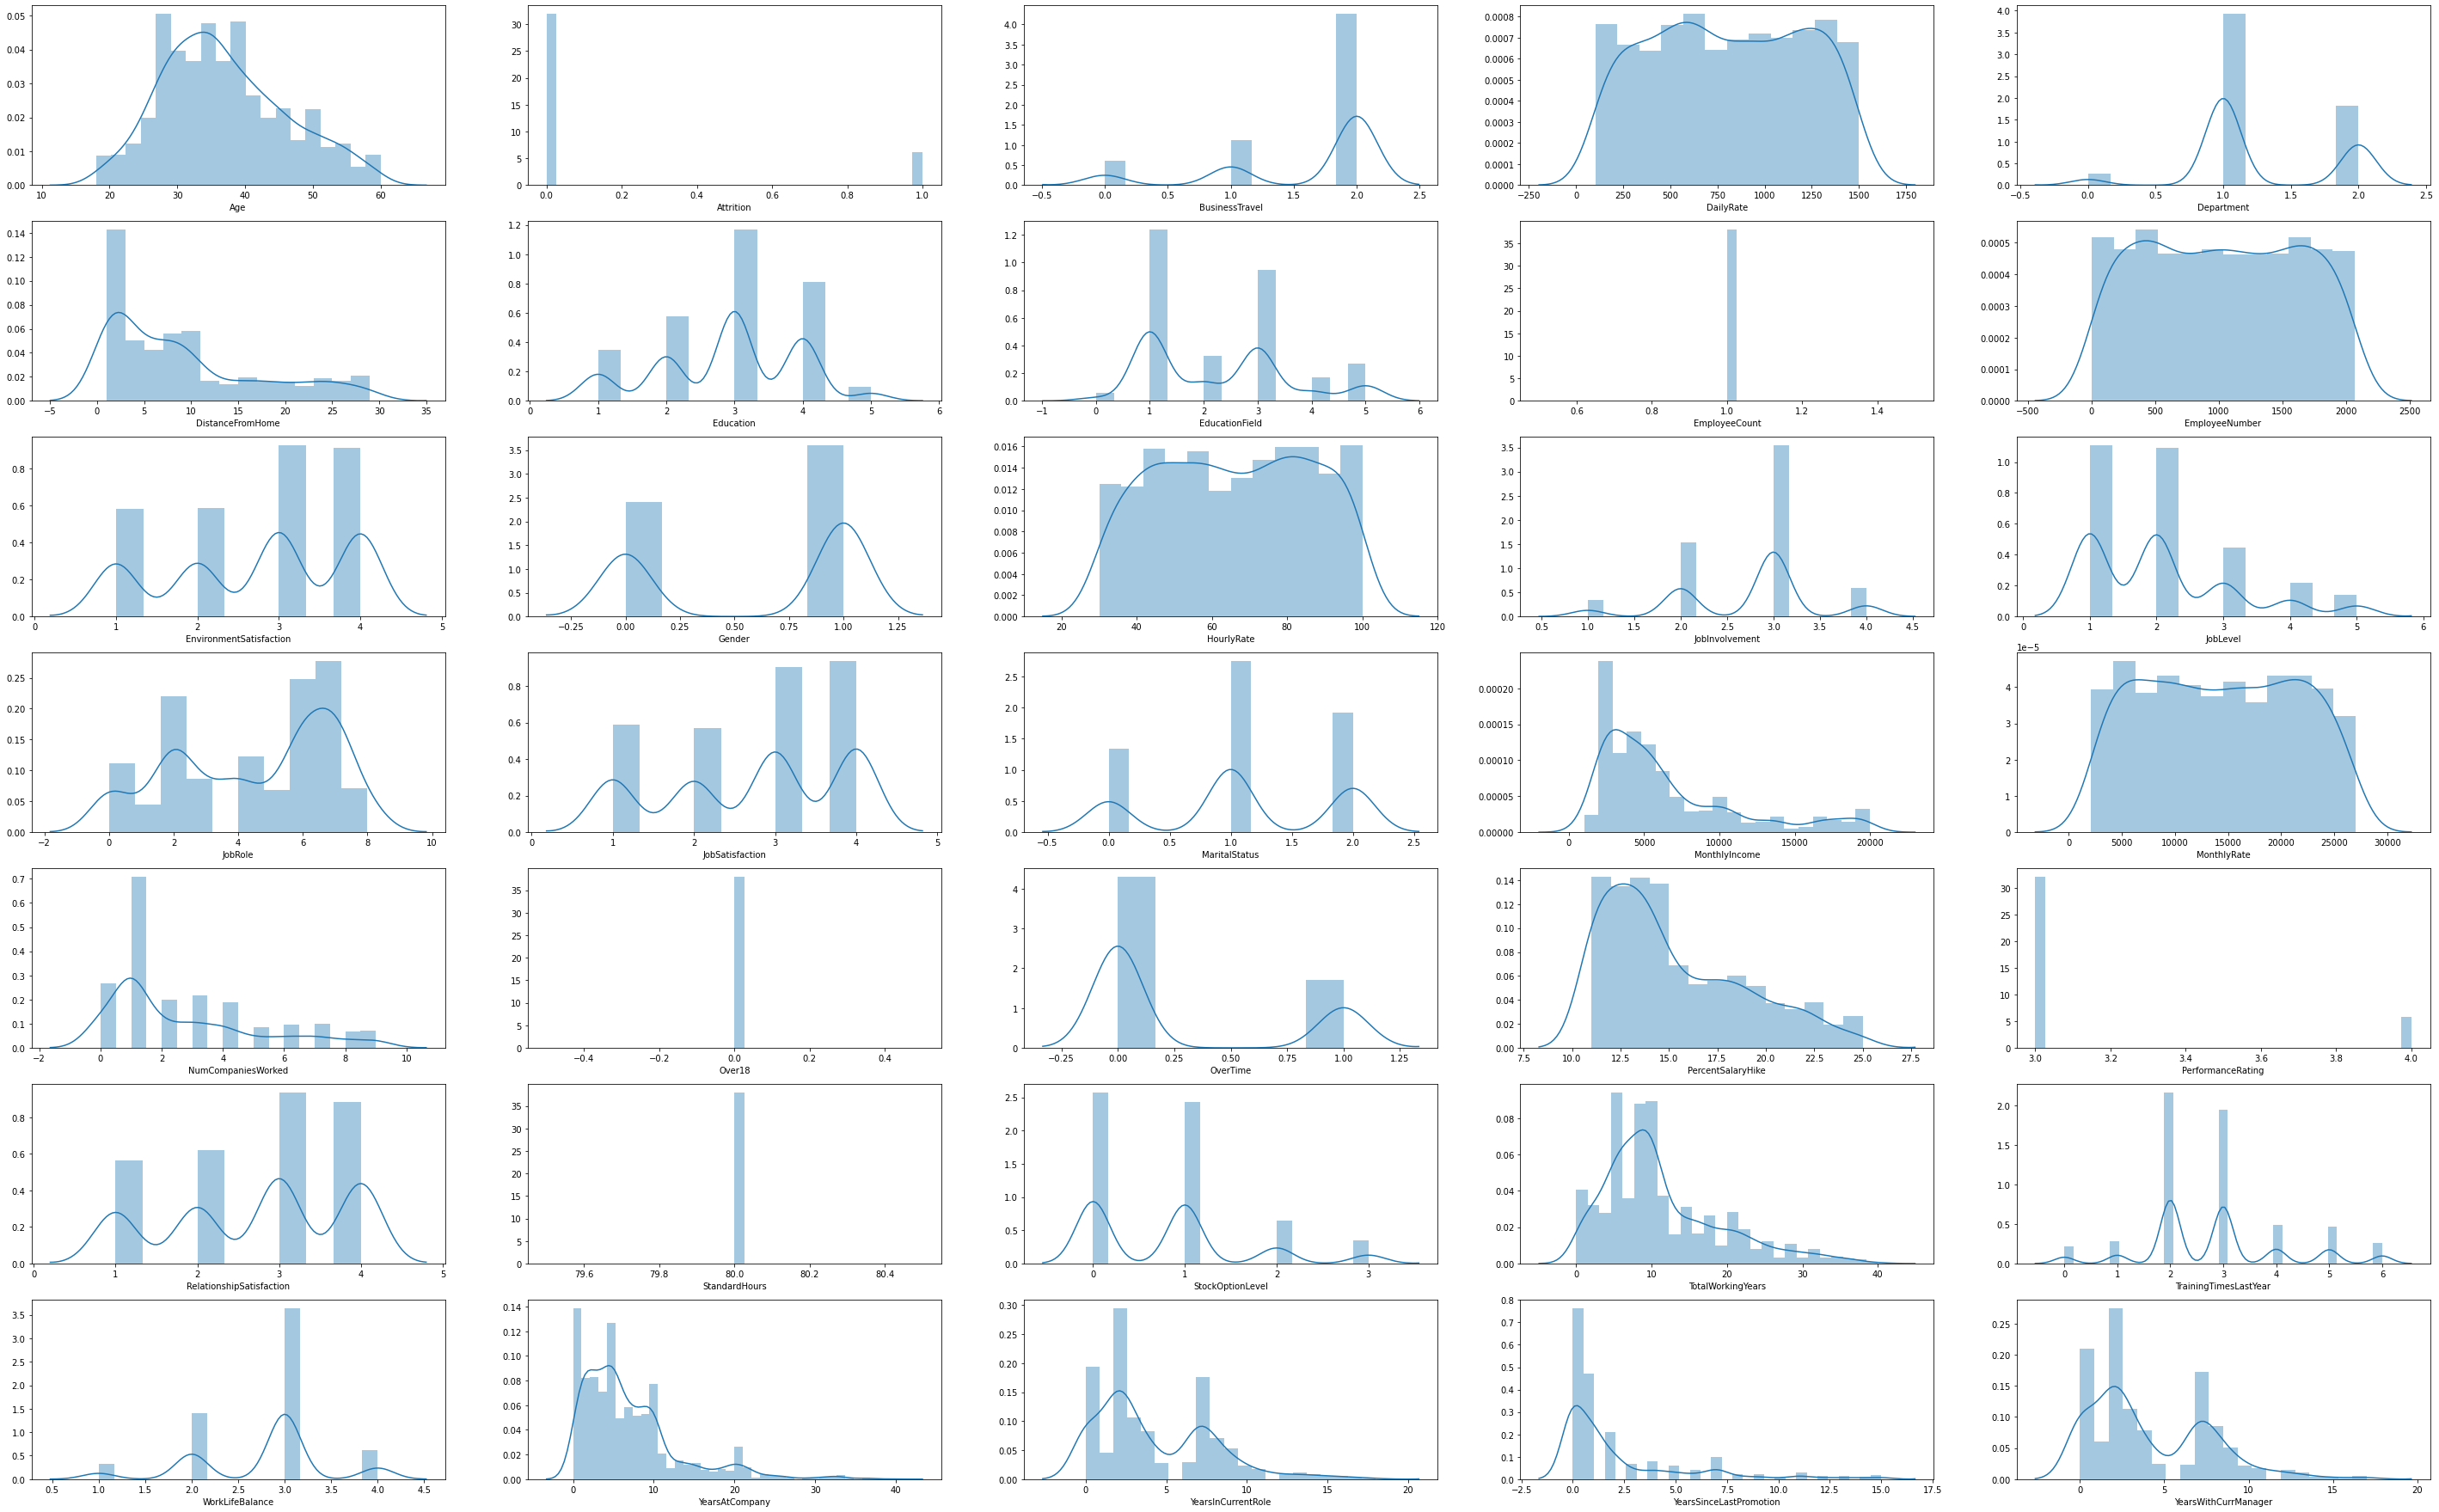

In [17]:
#univariate analysis
collist=df.columns.values
ncol=5
nrow=11
plt.figure(figsize=(50,50))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sn.distplot(df[collist[i]])

OBSERVATIONS:
    
    1. 70% OF THE TOTAL ATTRIBUTES SEEMS TO HAVE NORMAL DISTRIBUTION ANS SOME OF THEM HAVE POSITIVELY SKEWED DISTRIBUTION.
    
    2. IN THE TOTAL COMPANY POPULATION MALES ARE MORE THAN FEMALES.
    
    3. FACTORS LIKE 'YEARS SINCE LAST PROMOTION','YEARS WITH CORR MANAGER','WORK SATISFACTION' PLAYS AN IMORTANT ROLE.
    

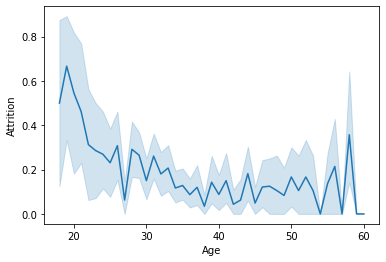

In [18]:
#BI-VARIATE ANALYSIS
sn.lineplot(x="Age",y="Attrition",data=df)

1. PEOPLR OF YOUNG AGE SEEMS TO HAVE HIGHER ATTRITION RATE THAN OF OLDER AGE.

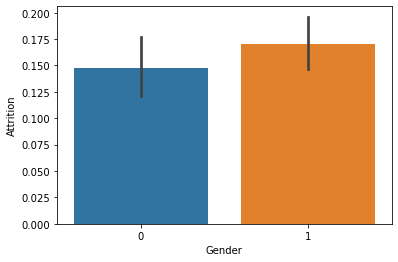

In [19]:
sn.barplot(x="Gender",y="Attrition",data=df)

1. IT SEEMS MALES HAVE HIGHER ATTRITION RATE COMPARED TO FEMALES.

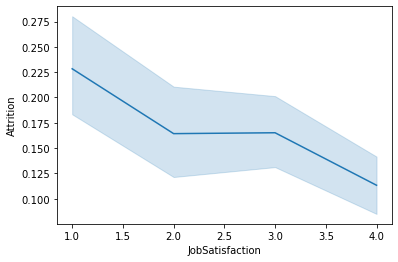

In [20]:
sn.lineplot(x="JobSatisfaction",y="Attrition",data=df)

1. JOB-SATISFACTION ALSO IMPACTS THE ATTRITION RATE MAJORLY.

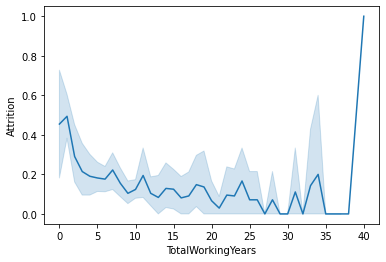

In [21]:
sn.lineplot(x="TotalWorkingYears",y="Attrition",data=df)

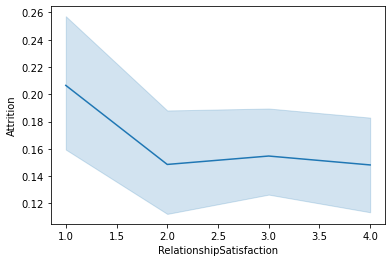

In [22]:
sn.lineplot(x="RelationshipSatisfaction",y="Attrition",data=df)

1. SOME PERSONAL PROBLEMS ALSO PALYS A KEY ROLE IN THE ATTRITION RATE.

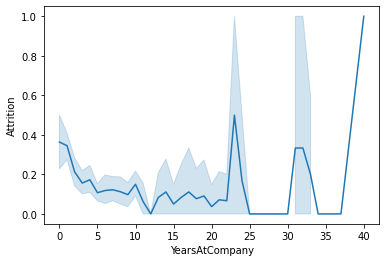

In [23]:
sn.lineplot(x="YearsAtCompany",y="Attrition",data=df)

1. PEOPLE OF LESS EXPERIENCE,EMPLOYESS WITH EXP WITHIN 20-25 AND EMPLOYEES WITH EXP WITHIN 30-35 HAS A HIGHER ATTRITION RATE.

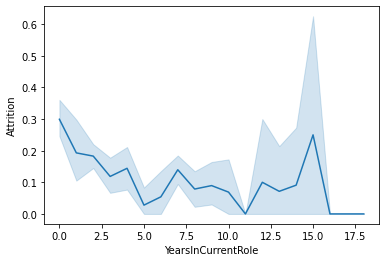

In [24]:
sn.lineplot(x="YearsInCurrentRole",y="Attrition",data=df)

1. EMPLOYEES IN A CERTAIN JOB ROLE FOR A VERY LONG TIME TEND TO LEAVE THE COMPANY IN A VERY LARGE NUMBER.

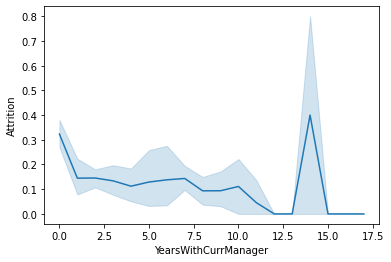

In [25]:
sn.lineplot(x="YearsWithCurrManager",y="Attrition",data=df)

1. ALSO FOR EMPLOYEES NO OF YEARS WITH THE CURRENT MANAGER WHICH RANGES FROM 12-15 YRS CAN MAKE THEM TO LEAVE THE COMPNY FOR A BETTER JOB ROLE.

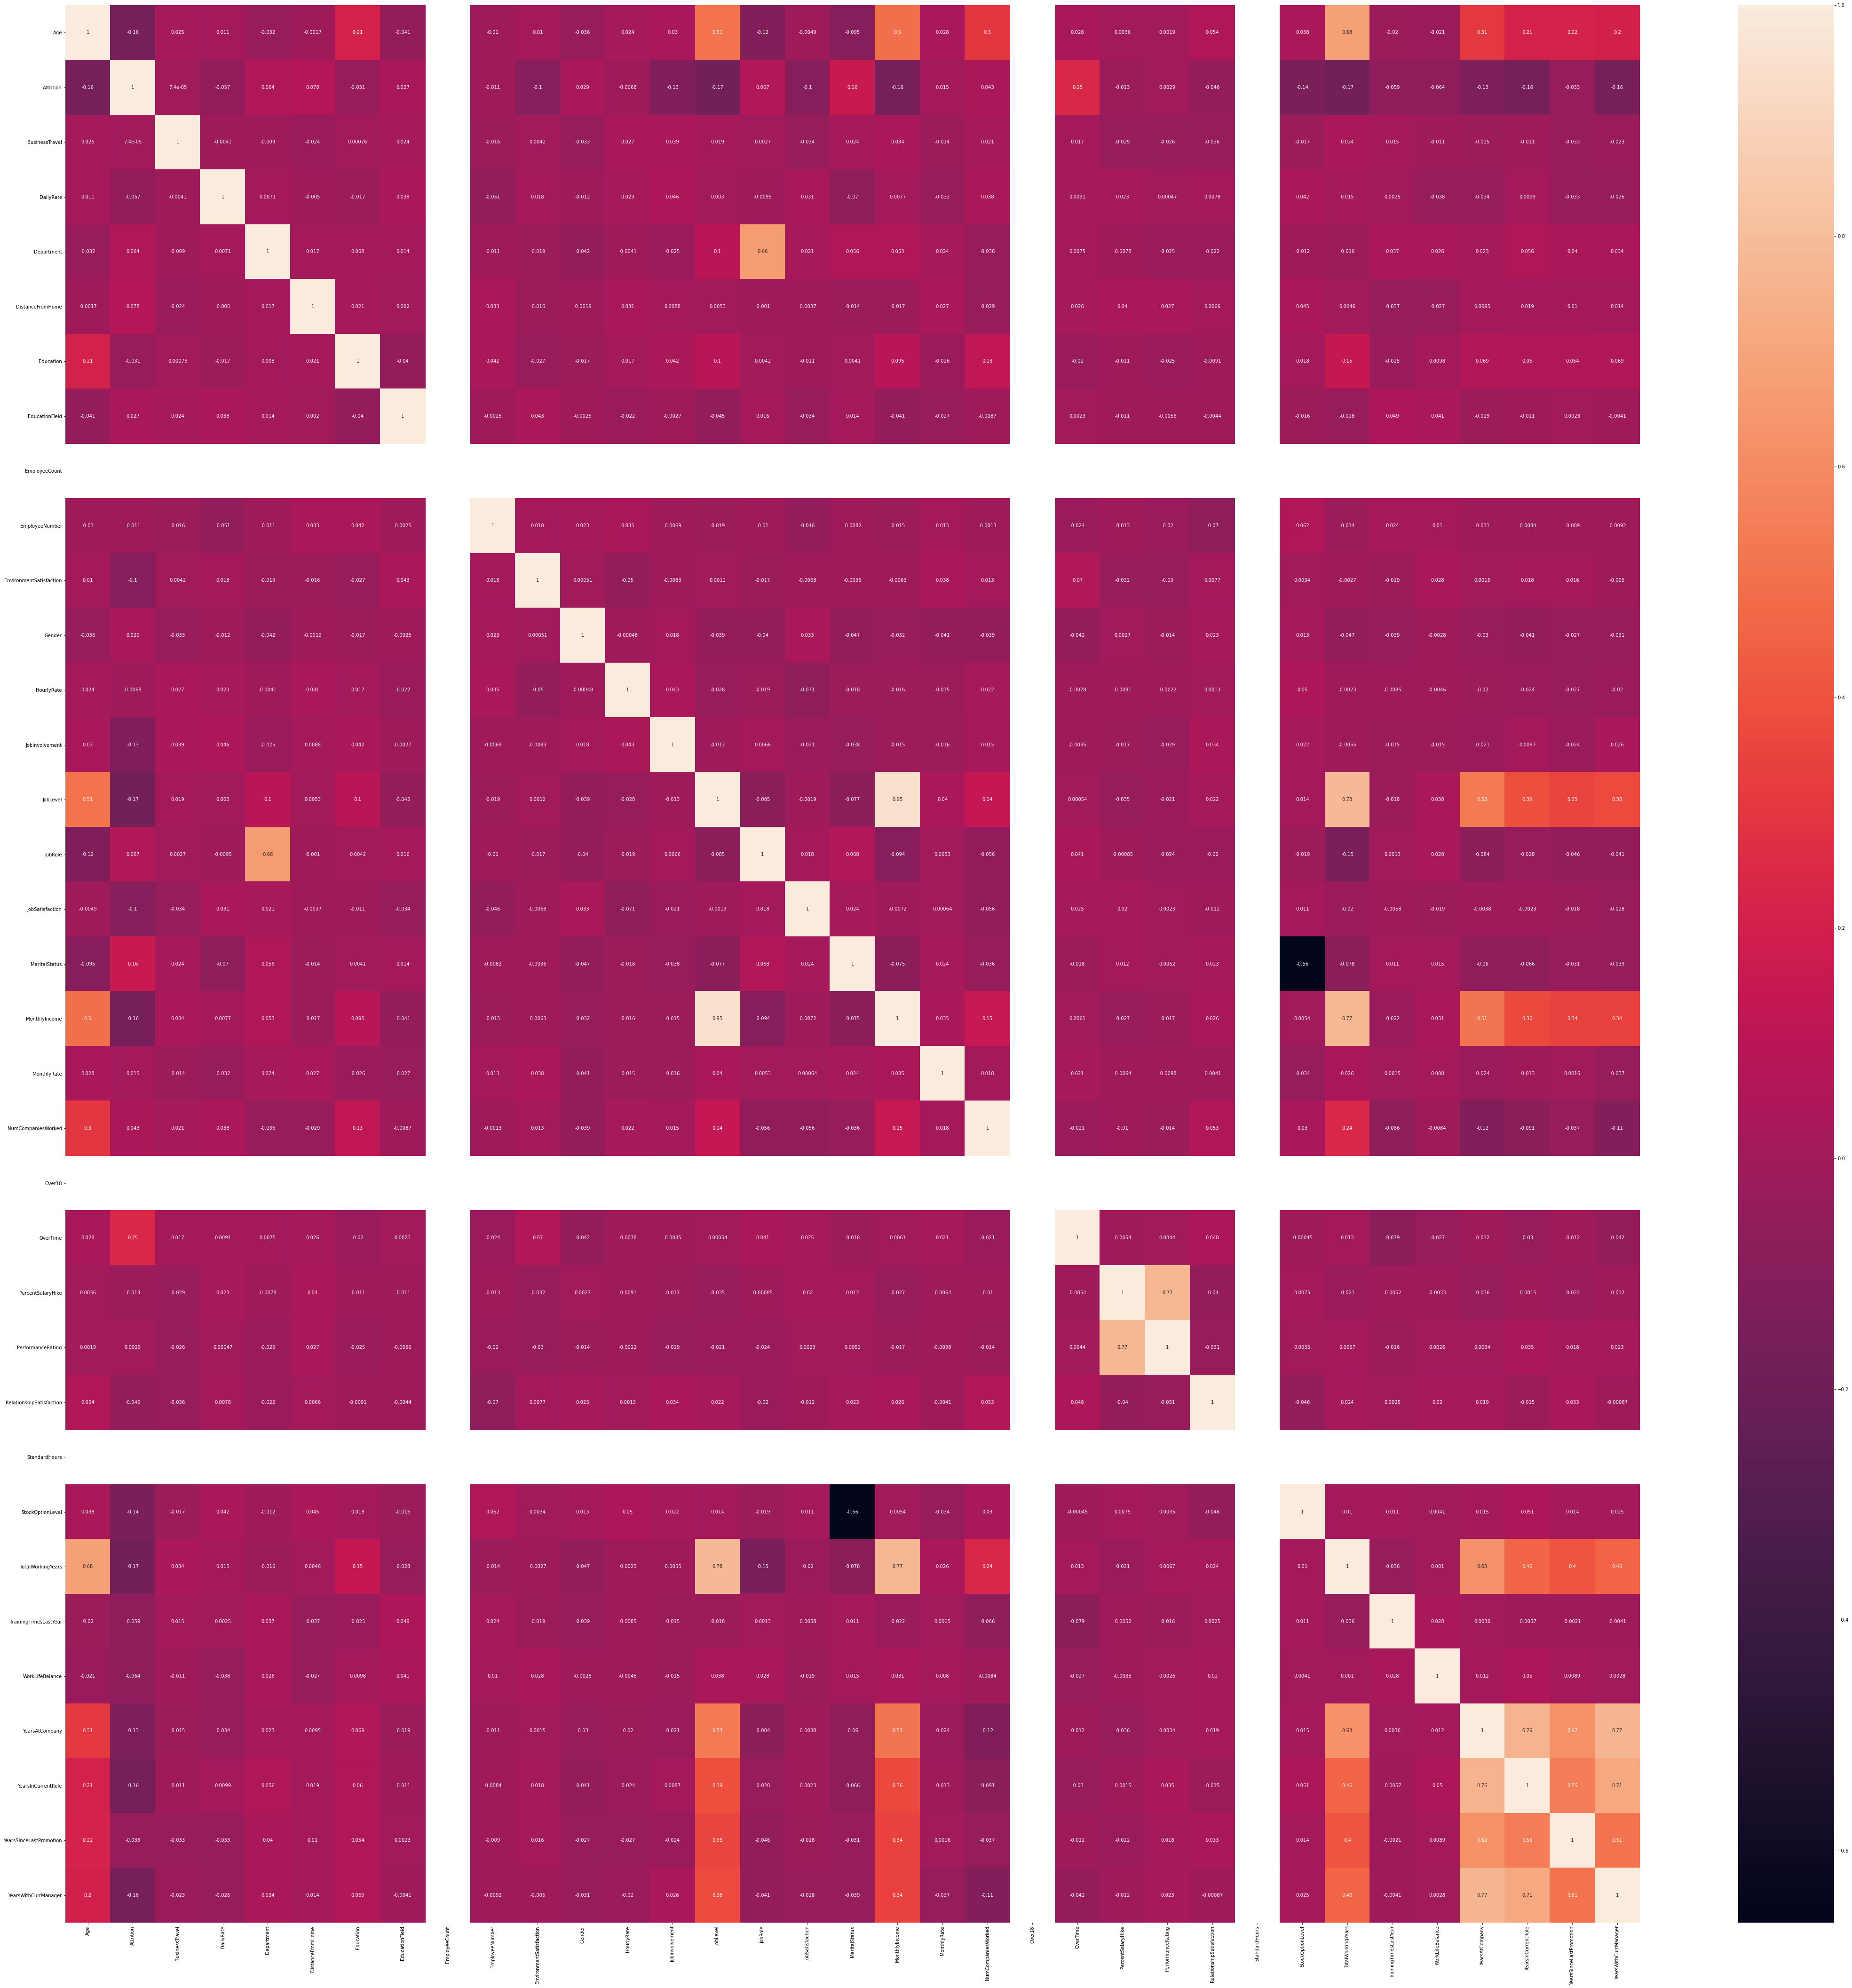

In [26]:
#MULTI-VARIATE ANALYSIS
corr=df.corr()
plt.figure(figsize=(75,75))
sn.heatmap(corr,annot=True)

OBSERVATIONS :
    
    1. FACTORS LIKE EMP.COUNT,OVER 18,STAND.HOURS HASHES THEMSELVES OUT OF THE EQUATION BY PROVIDING NO CORRELATION VALUES WHICH MAY IMPACT THE GIVEN DATA-SET.
    
    2. FACTORS LIKE 'Age', 'Attrition','DailyRate','Education','EmployeeNumber', 'EnvironmentSatisfaction','HourlyRate',
       'JobInvolvement', 'JobLevel','JobSatisfaction', 'MonthlyIncome','PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager' COREELATE NEGATIVELY WITH THE TARGET DATA.
   
    3.WHEREAS ALL THE OTHER FACTORS CORRELATE POSITIVELY.

In [27]:
df.drop(["EmployeeCount","StandardHours","Over18"],axis=1,inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


> IN THE ABOVE TABLE WE HAVE DROPPED "EmployeeCount","StandardHours","Over18" FOR NOT PROVIDING TANGIBLE CORRELATING DATA.

# Finding Skewness in the given Data-set

In [28]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

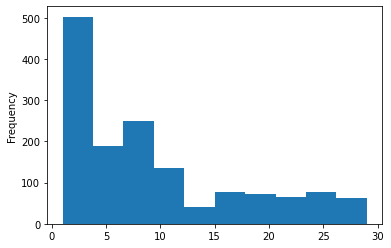

In [29]:
#Graphival representation of skewdness
df["DistanceFromHome"].plot.hist()

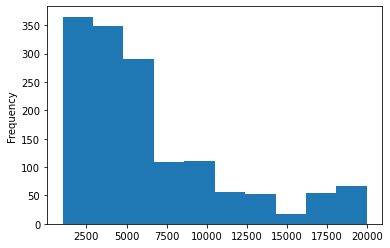

In [30]:
df["MonthlyIncome"].plot.hist()

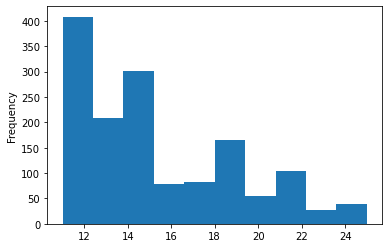

In [31]:
df["PercentSalaryHike"].plot.hist()

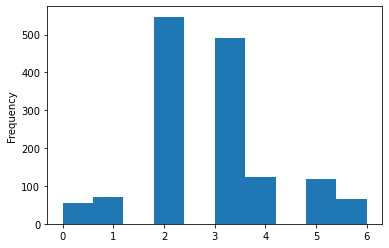

In [32]:
df["TrainingTimesLastYear"].plot.hist()

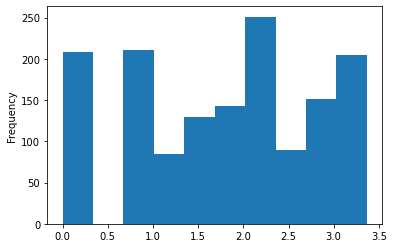

In [33]:
#removing skewness using boxcox
from scipy.stats import boxcox
df["DistanceFromHome"]=boxcox(df["DistanceFromHome"],0) #0 represents log transform
df["DistanceFromHome"].plot.hist()

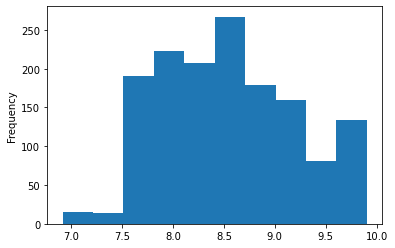

In [34]:
df["MonthlyIncome"]=boxcox(df["MonthlyIncome"],0) #0 represents log transform
df["MonthlyIncome"].plot.hist()

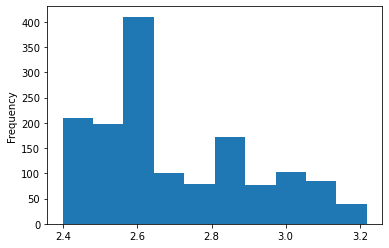

In [35]:
df["PercentSalaryHike"]=boxcox(df["PercentSalaryHike"],0) #0 represents log transform
df["PercentSalaryHike"].plot.hist()

# PLOTTING OUTLIERS

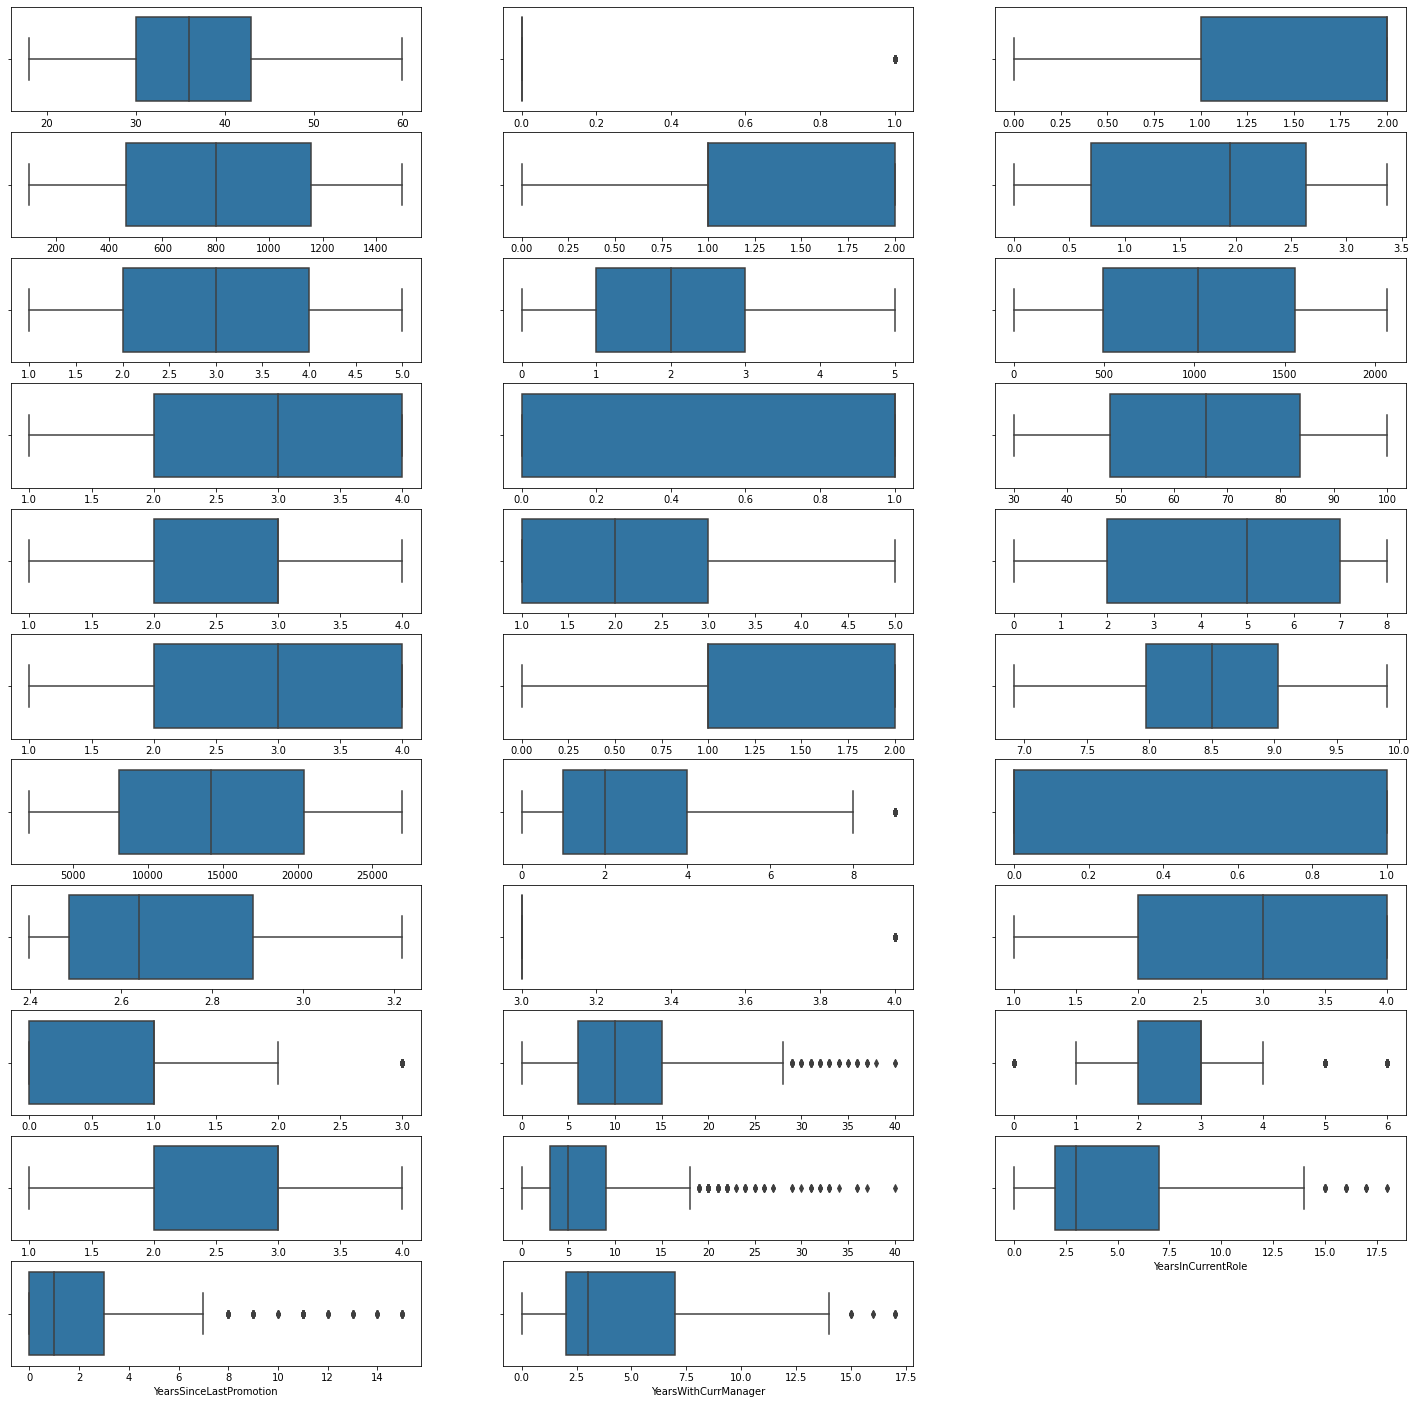

In [36]:
collist=df.columns.values
ncol=3
nrow=11
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sn.boxplot(df[collist[i]])

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.4463504 , 2.28090588, 0.59004834, ..., 0.0632959 , 0.67914568,
        0.24583399],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.76499762, 0.36871529,
        0.80654148],
       [0.008343  , 2.28090588, 0.59004834, ..., 1.16768726, 0.67914568,
        1.15593471],
       ...,
       [1.08667552, 0.4384223 , 0.59004834, ..., 0.61549158, 0.67914568,
        0.31487349],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.48889978, 0.67914568,
        1.08689522],
       [0.32016256, 0.4384223 , 0.59004834, ..., 0.33939374, 0.36871529,
        0.59522723]])

# REMOVING OUTLIERS

In [38]:
threshold=3
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,0.000000,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,2.079442,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,0.693147,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,1.098612,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,0.693147,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,3.135494,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,1.791759,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,1.386294,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,0.693147,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


# BUILIDING MACHINE LEARNING MODELS

# PREPARING DATA-SET FOR TRAINING AND TESTING

In [39]:
x=df.drop("Attrition",axis=1)
y=df["Attrition"]

In [40]:
#USING STANDARD SCALER FOR STANDARDISING THE DATA-SET
from sklearn.preprocessing import StandardScaler
stc=StandardScaler()
x=stc.fit_transform(x)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [42]:
x_train.shape

(1029, 31)

In [43]:
y_train.shape

(1029,)

In [44]:
x_test.shape

(441, 31)

In [45]:
y_test.shape

(441,)


# MACHINE LEARNING MODEL

MACHINE LEARNING MODELS For the above data-set we will use

1.LOGISTIC REGRESSION

2.NAIVES BAYES CLASSIFICATION

3.RANDOM FOREST


In [46]:
#Logictic Regression
lg=LogisticRegression()
lg.fit(x_train,y_train)#for Training purpose
lg_pred=lg.predict(x_test)#for Testing purpose
print(lg_pred)
print("\nAccuracy score : ",accuracy_score(y_test,lg_pred))
print("\nConfussion matrix : ",confusion_matrix(y_test,lg_pred))
print("\nclassification report : ",classification_report(y_test,lg_pred))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]

Accuracy score :  0.873015873015873

Confussion matrix :  [[367  13]
 [ 43  18]]

classification report 

In [47]:
#RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=11.774886971527188,cross_value_score=18.98403233837145,and difference=-7.209145366844261


In [48]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
acc={metrics.accuracy_score(y_test, y_pred)*100}
print("Accuracy:",acc)

Accuracy: {78.91156462585033}


# CONCLUSION REMARKS:

# NOW WE CAN SEE THAT FROM THE ABOVE CLASSIFICATION MACHINE LEARNING MODELS "LOGISTIC REGRESSION" HAS A HIGHEST ACCURACY RATE OF 87.0% .

# COMPARING THE ORIGINAL AND PREDICTED DATAS

In [49]:
a=np.array(y_test)
predicted=np.array(y_pred)
new=pd.DataFrame({"original":a,"predicted":predicted})
new.tail()

,original,predicted
436,0,0
437,0,0
438,1,1
439,0,0
440,1,1


# SAVING THE DATA-SET FOR PRODUCTION

In [50]:
import joblib 
joblib.dump(lg,"ibm-hr-analytics-employee-attrition-performance.pkl")

['ibm-hr-analytics-employee-attrition-performance.pkl']